# 1. Prepare the environment

In [6]:
# List all NVIDIA GPUs as avaialble in this computer (or Colab's session)
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-031b4a35-4dcb-4be1-9a3e-ddc211377031)


In [7]:
import sys
print( f"Python {sys.version}\n" )

import numpy as np
print( f"NumPy {np.__version__}\n" )

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
print( f"TensorFlow {tf.__version__}" )
print( f"tf.keras.backend.image_data_format() = {tf.keras.backend.image_data_format()}" )

# Count the number of GPUs as detected by tensorflow
gpus = tf.config.list_physical_devices('GPU')
print( f"TensorFlow detected { len(gpus) } GPU(s):" )
for i, gpu in enumerate(gpus):
  print( f".... GPU No. {i}: Name = {gpu.name} , Type = {gpu.device_type}" )

Python 3.7.15 (default, Oct 12 2022, 19:14:55) 
[GCC 7.5.0]

NumPy 1.21.6

TensorFlow 2.9.2
tf.keras.backend.image_data_format() = channels_last
TensorFlow detected 1 GPU(s):
.... GPU No. 0: Name = /physical_device:GPU:0 , Type = GPU


# Import pic

In [8]:
# Load Data from Google Drive
from google.colab import drive
import os
drive.mount('/content/drive')
# data= pd.read_csv('/content/drive/MyDrive/DAD7202/hotel_bookings.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import cv2

In [10]:
# change path
os.listdir('/content/drive/MyDrive/RCNN/')

['test8.jpg',
 'test9.jpg',
 'test6.jpg',
 'test7.jpg',
 'Yolov5.ipynb',
 'test5.jpg',
 'test4.jpg',
 'backup',
 'british_shorthair',
 'american_shorthair',
 'exotic_shorthair',
 'scottish_fold',
 'mobilenetv3_small_V3_Final.ipynb',
 'resnet50v2.ipynb',
 'vgg16_Final.ipynb']

In [11]:
label_class = {'exotic_shorthair':0,'scottish_fold':1 ,'american_shorthair':2,'british_shorthair':3}

In [12]:
list(label_class.keys())

['exotic_shorthair',
 'scottish_fold',
 'american_shorthair',
 'british_shorthair']

In [13]:
from sklearn.model_selection import train_test_split
x_train = []
x_test =[]
x_val = []

y_train = []
y_test = []
y_val = []

img_size = (224,224)

for c in list(label_class.keys()):
  filename = [i for i in os.listdir('/content/drive/MyDrive/RCNN/{0}'.format(c)) if 'jpg' in i]
  train_index, val_index, = train_test_split(filename, test_size = 0.2, random_state = 1)
  val_index, test_index, = train_test_split(val_index, test_size = 0.5, random_state = 1)

  for i in train_index:
    img = cv2.imread('/content/drive/MyDrive/RCNN/{0}/{1}'.format(c,i))
    # print('/content/drive/MyDrive/RCNN/{0}/{1}'.format(c,i))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,img_size)
    x_train.append(img)
    y_train.append([label_class[c]])

  for i in val_index:
    img = cv2.imread('/content/drive/MyDrive/RCNN/{0}/{1}'.format(c,i))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,img_size)
    x_val.append(img)
    y_val.append([label_class[c]])

  for i in test_index:
    img = cv2.imread('/content/drive/MyDrive/RCNN/{0}/{1}'.format(c,i))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,img_size)
    x_test.append(img)
    y_test.append([label_class[c]])

# Random train test

In [14]:
import random

random.seed(0)
train_index = [i for i in range(len(x_train))]
test_index = [i for i in range(len(x_test))]

random.shuffle(train_index)
random.shuffle(test_index)

x_train = [x_train[i] for i in train_index]
y_train = [y_train[i] for i in train_index]

x_test = [x_test[i] for i in test_index]
y_test = [y_test[i] for i in test_index]

In [15]:
import sys
print( f"Python {sys.version}\n" )

import numpy as np
print( f"NumPy {np.__version__}\n" )

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
print( f"TensorFlow {tf.__version__}" )
print( f"tf.keras.backend.image_data_format() = {tf.keras.backend.image_data_format()}" )

# Count the number of GPUs as detected by tensorflow
gpus = tf.config.list_physical_devices('GPU')
print( f"TensorFlow detected { len(gpus) } GPU(s):" )
for i, gpu in enumerate(gpus):
  print( f".... GPU No. {i}: Name = {gpu.name} , Type = {gpu.device_type}" )

Python 3.7.15 (default, Oct 12 2022, 19:14:55) 
[GCC 7.5.0]

NumPy 1.21.6

TensorFlow 2.9.2
tf.keras.backend.image_data_format() = channels_last
TensorFlow detected 1 GPU(s):
.... GPU No. 0: Name = /physical_device:GPU:0 , Type = GPU


# Seed

In [16]:
np.random.seed(1234)
tf.random.set_seed(5678)
#tf.random.set_seed(8753)
#tf.random.set_seed(1974)
#tf.random.set_seed(2012)
#tf.random.set_seed(8289)
#tf.random.set_seed(1238)

In [17]:
from tensorflow import keras
from tensorflow.keras import layers

In [18]:
img_height = 224
img_width = 224
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomBrightness(factor=0.3,value_range=(0, 255), seed=64),
  ]
)

# Augment

In [19]:
aug_x_train = []
aug_y_train = []

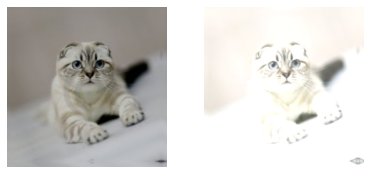

In [20]:
images =  np.array(x_train)

plt.figure(figsize=(10, 10))
for i in range(2):
  ax = plt.subplot(3, 3, i + 1)
  augmented_images = data_augmentation(images)
  plt.imshow(augmented_images[0].numpy().astype("uint8") )
  plt.axis('off')
  for index,i in enumerate(augmented_images):
    aug_x_train.append(i.numpy().astype("uint8"))
    aug_y_train.append(y_train[index])
    

american_shorthair


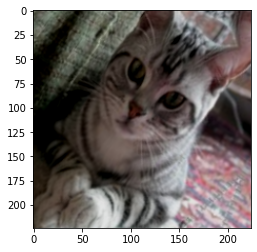

In [21]:
print(list(label_class.keys())[aug_y_train[1001][0]])
plt.imshow(aug_x_train[1001])


In [22]:
for index,i in enumerate(x_train):
  
  seed = tf.random.uniform((2,), minval=0, maxval=65536).numpy().astype("int32")
  img = tf.image.stateless_random_hue(i, 0.5, seed).numpy().astype("uint8")
  aug_x_train.append(img)
  aug_y_train.append(y_train[index])

In [23]:
len(aug_x_train)

1860

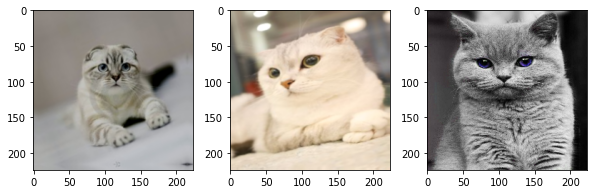

In [24]:
plt.figure(figsize=(10, 10))

ax = plt.subplot(3, 3, 1)
plt.imshow(aug_x_train[0])

ax = plt.subplot(3, 3, 2)
plt.imshow(aug_x_train[639])

ax = plt.subplot(3, 3, 3)
plt.imshow(aug_x_train[1278])

In [25]:
# plt.figure(figsize=(10, 10))

# ax = plt.subplot(3, 3, 1)
# plt.imshow(x_train[0])

# ax = plt.subplot(3, 3, 2)
# plt.imshow(augmented_images[0].numpy().astype("uint8"))

# ax = plt.subplot(3, 3, 3)
# seed = tf.random.uniform((2,), minval=0, maxval=65536).numpy().astype("int32")
# plt.imshow(tf.image.stateless_random_hue(x_train[0], 0.5, seed).numpy().astype("uint8"))

In [26]:
# Load the ImageNet VGG-16 model, ***excluding*** the latter part regarding the classifier
# Default of input_shape is 224x224x3 for VGG-16
#img_w,img_h = 32,32     # image size of CIFAR-10

#backbone vgg16
vgg16_extractor = tf.keras.applications.vgg16.VGG16(weights = "imagenet", include_top=False, input_shape = (224, 224, 3))

vgg16_extractor.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [27]:
# backbone : vgg16

import tensorflow as tf
x_train_vgg = tf.keras.applications.vgg16.preprocess_input(np.array(aug_x_train))
x_test_vgg = tf.keras.applications.vgg16.preprocess_input(np.array(x_test))

print( x_train_vgg.dtype, x_train_vgg.shape, np.min(x_train_vgg), np.max(x_train_vgg) )
print( x_test_vgg.dtype, x_test_vgg.shape, np.min(x_test_vgg), np.max(x_test_vgg) )

float32 (1860, 224, 224, 3) -123.68 151.061
float32 (79, 224, 224, 3) -123.68 151.061


# Fine tune

In [28]:
# freeze all layer
vgg16_extractor.trainable = False

# unfreeze each layer
# [179:185] --> เลือก layer ที่จะ unfreeze จะ unfreeeze ตั้งแต่ layer 179 - layer 185

for i,layer in enumerate(vgg16_extractor.layers[11:]):  
     layer.trainable = True

In [29]:
# Recursively freeze all layers in the model

for i,layer in enumerate(vgg16_extractor.layers):  
    print( f"Layer {i}: name = {layer.name} , trainable = {layer.trainable}" )

Layer 0: name = input_1 , trainable = False
Layer 1: name = block1_conv1 , trainable = False
Layer 2: name = block1_conv2 , trainable = False
Layer 3: name = block1_pool , trainable = False
Layer 4: name = block2_conv1 , trainable = False
Layer 5: name = block2_conv2 , trainable = False
Layer 6: name = block2_pool , trainable = False
Layer 7: name = block3_conv1 , trainable = False
Layer 8: name = block3_conv2 , trainable = False
Layer 9: name = block3_conv3 , trainable = False
Layer 10: name = block3_pool , trainable = False
Layer 11: name = block4_conv1 , trainable = True
Layer 12: name = block4_conv2 , trainable = True
Layer 13: name = block4_conv3 , trainable = True
Layer 14: name = block4_pool , trainable = True
Layer 15: name = block5_conv1 , trainable = True
Layer 16: name = block5_conv2 , trainable = True
Layer 17: name = block5_conv3 , trainable = True
Layer 18: name = block5_pool , trainable = True


#Classifier

In [30]:
x = vgg16_extractor.output

# Add our custom layer(s) to the end of the existing model 
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(256, activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)
new_outputs = tf.keras.layers.Dense(4, activation="softmax")(x)

# Construct the main model 
model = tf.keras.models.Model(inputs=vgg16_extractor.inputs, outputs=new_outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [31]:
# base_model = tf.keras.applications.resnet_v2.ResNet50V2(weights = "imagenet", include_top=False, input_shape = (224, 224, 3))
# preprocess_input = tf.keras.applications.resnet_v2.preprocess_input
# prediction_layer = tf.keras.layers.Dense(4)

In [32]:
# inputs = tf.keras.Input(shape=(224, 224, 3))
# x = data_augmentation(inputs)
# # x = preprocess_input(x)
# x = base_model(x, training=False)
# # x = global_average_layer(x)
# x = tf.keras.layers.Flatten()(x)
# x = tf.keras.layers.Dense(512, activation="relu")(x)
# x = tf.keras.layers.Dropout(0.5)(x)
# new_outputs = tf.keras.layers.Dense(4, activation="softmax")(x)

# model = tf.keras.Model(inputs, new_outputs)
# model.summary()

# Tuning learning rate

In [33]:
#model.compile( loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"] ) 

#change learning rate

model.compile( loss="sparse_categorical_crossentropy", optimizer = tf.keras.optimizers.Adam (learning_rate=0.0001, name = 'Adam'), metrics=["acc"] )

In [34]:
checkpoint_filepath = "bestmodel_epoch.hdf5"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint( filepath=checkpoint_filepath,
                                                                                              save_weights_only=True,
                                                                                              monitor='val_acc',
                                                                                              mode='max',
                                                                                              save_best_only=True)

# Tuning batch_size and epochs

In [35]:
%%time

# change batch_size, epochs

history = model.fit( x_train_vgg, np.array(aug_y_train), batch_size=128, epochs=50, verbose=1,validation_data=(x_test_vgg, np.array(y_test)), callbacks=[model_checkpoint_callback])

Epoch 1/50
15/15 [==============================] - 44s 2s/step - loss: 3.4371 - acc: 0.2952 - val_loss: 1.3746 - val_acc: 0.3038
Epoch 2/50
15/15 [==============================] - 12s 817ms/step - loss: 1.3627 - acc: 0.3043 - val_loss: 1.3085 - val_acc: 0.4304
Epoch 3/50
15/15 [==============================] - 12s 822ms/step - loss: 1.2471 - acc: 0.4215 - val_loss: 1.1272 - val_acc: 0.5570
Epoch 4/50
15/15 [==============================] - 12s 829ms/step - loss: 1.1122 - acc: 0.5065 - val_loss: 1.0357 - val_acc: 0.5696
Epoch 5/50
15/15 [==============================] - 12s 831ms/step - loss: 0.9037 - acc: 0.6258 - val_loss: 0.6794 - val_acc: 0.7468
Epoch 6/50
15/15 [==============================] - 12s 834ms/step - loss: 0.6714 - acc: 0.7403 - val_loss: 0.6486 - val_acc: 0.7848
Epoch 7/50
15/15 [==============================] - 13s 857ms/step - loss: 0.4673 - acc: 0.8156 - val_loss: 0.5583 - val_acc: 0.7975
Epoch 8/50
15/15 [==============================] - 12s 828ms/step - los

In [36]:
model.load_weights('/content/bestmodel_epoch.hdf5')

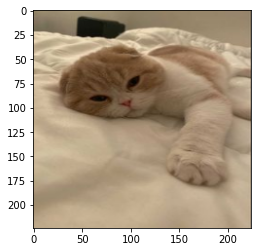

In [37]:
test_img = x_test[35]
plt.imshow(test_img)

In [38]:
# change backbone name

test_vgg = tf.keras.applications.vgg16.preprocess_input(np.array([test_img]))

In [39]:
pred = model.predict(test_vgg)

1/1 [==============================] - 1s 832ms/step


In [40]:
list(label_class.keys())[np.argmax(pred)]

'british_shorthair'

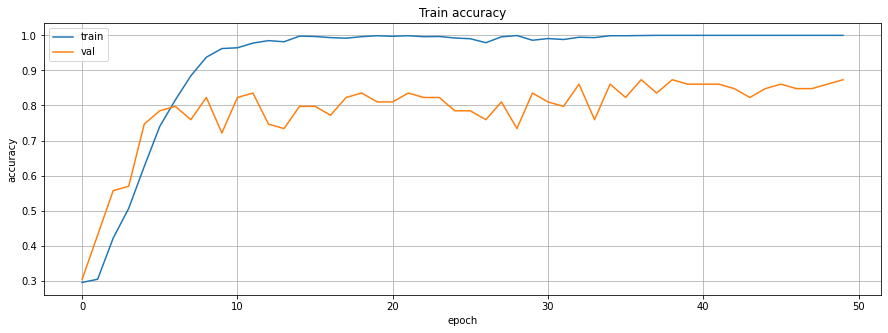

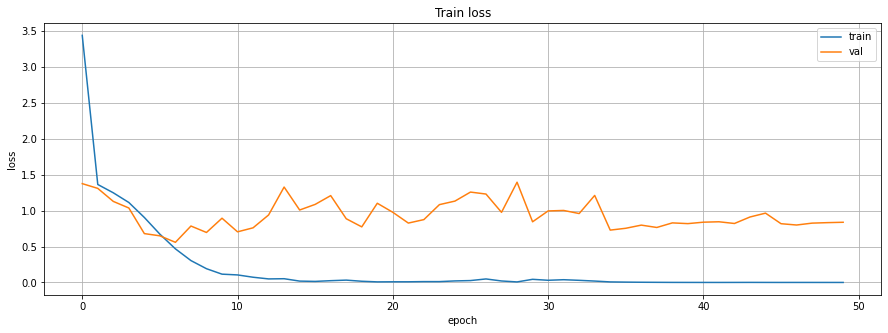

In [41]:
# Summarize history for accuracy
plt.figure(figsize=(15,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.show()

# Summarize history for loss
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.grid()
plt.show()

In [42]:
# Test using the model on x_test[i]
# change backbone name

X_val_res = tf.keras.applications.vgg16.preprocess_input(np.array(x_val))
y_pred = model.predict( X_val_res )   # reshape x_test[i] from (n_feature,) to (1, n_feature)
round_pred = [np.argmax(i) for i in y_pred]

3/3 [==============================] - 4s 757ms/step


## validate score

In [43]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
from sklearn import metrics

print(classification_report(y_val,round_pred))

# fpr, tpr, thresholds = metrics.roc_curve(y_test, round_pred)
# print('AUC score',metrics.auc(fpr, tpr))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        20
           1       0.76      0.84      0.80        19
           2       0.89      0.84      0.86        19
           3       0.85      0.94      0.89        18

    accuracy                           0.87        76
   macro avg       0.88      0.87      0.87        76
weighted avg       0.88      0.87      0.87        76



## train score

In [44]:
# Test using the model on x_test[i]

y_pred = model.predict(x_train_vgg)   # reshape x_test[i] from (n_feature,) to (1, n_feature)
round_pred = [np.argmax(i) for i in y_pred]

59/59 [==============================] - 9s 161ms/step


In [45]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
from sklearn import metrics

print(classification_report(aug_y_train,round_pred))

# fpr, tpr, thresholds = metrics.roc_curve(y_test, round_pred)
# print('AUC score',metrics.auc(fpr, tpr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       492
           1       1.00      1.00      1.00       468
           2       1.00      1.00      1.00       456
           3       1.00      1.00      1.00       444

    accuracy                           1.00      1860
   macro avg       1.00      1.00      1.00      1860
weighted avg       1.00      1.00      1.00      1860



## Test scrore

In [46]:
# Test using the model on x_test[i]

y_pred = model.predict(x_test_vgg)   # reshape x_test[i] from (n_feature,) to (1, n_feature)
round_pred = [np.argmax(i) for i in y_pred]

3/3 [==============================] - 2s 930ms/step


In [47]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
from sklearn import metrics

print(classification_report(y_test,round_pred))

# fpr, tpr, thresholds = metrics.roc_curve(y_test, round_pred)
# print('AUC score',metrics.auc(fpr, tpr))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        21
           1       1.00      0.75      0.86        20
           2       0.95      1.00      0.97        19
           3       0.81      0.89      0.85        19

    accuracy                           0.87        79
   macro avg       0.89      0.88      0.87        79
weighted avg       0.88      0.87      0.87        79



In [61]:
label_class = {'exotic_shorthair':0,'scottish_fold':1 ,'american_shorthair':2,'british_shorthair':3}

In [62]:
new_img = []

In [63]:
for i in range(4):
  for index,j in enumerate(y_train):
    if j == [i]:
      new_img.append(x_train[index])
      break

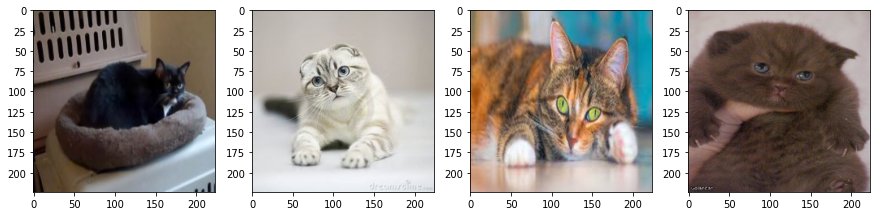

In [64]:
plt.figure(figsize=(15, 15))

for i in range(4):
  ax = plt.subplot(1, 4, i+1)
  plt.imshow(new_img[i])

In [65]:
pre_img = tf.keras.applications.vgg16.preprocess_input(np.array(new_img))

In [66]:
original_model =  tf.keras.applications.vgg16.VGG16(weights = "imagenet")

553467096/553467096 [==============================] - 7s 0us/step


In [67]:
predictions = original_model.predict(pre_img) 

1/1 [==============================] - 0s 133ms/step


In [68]:
predictions

array([[5.0678568e-07, 7.4316137e-07, 1.3859424e-06, ..., 3.0665143e-07,
        6.1351791e-05, 2.3632806e-02],
       [3.5320679e-07, 7.7986570e-06, 2.0783439e-06, ..., 1.7048214e-07,
        2.3342738e-05, 5.7696260e-04],
       [3.1607925e-07, 6.2619060e-06, 2.9482076e-06, ..., 2.9583424e-07,
        8.7599656e-05, 5.2968968e-05],
       [2.3789303e-08, 6.0366409e-07, 4.2849604e-09, ..., 2.8043910e-08,
        3.1729737e-06, 4.1640647e-05]], dtype=float32)

In [69]:
from keras.applications.imagenet_utils import decode_predictions 
label = decode_predictions(predictions) 

In [70]:
label

[[('n04265275', 'space_heater', 0.5760594),
  ('n04040759', 'radiator', 0.07498674),
  ('n03133878', 'Crock_Pot', 0.029666929),
  ('n04442312', 'toaster', 0.02870146),
  ('n02808440', 'bathtub', 0.027473554)],
 [('n02124075', 'Egyptian_cat', 0.3581076),
  ('n02123045', 'tabby', 0.26654208),
  ('n02123159', 'tiger_cat', 0.11209641),
  ('n02127052', 'lynx', 0.05988649),
  ('n02123394', 'Persian_cat', 0.025487306)],
 [('n02123159', 'tiger_cat', 0.5253156),
  ('n02123045', 'tabby', 0.34540093),
  ('n02124075', 'Egyptian_cat', 0.09028384),
  ('n03942813', 'ping-pong_ball', 0.0047510313),
  ('n04040759', 'radiator', 0.0030518519)],
 [('n02123394', 'Persian_cat', 0.97970635),
  ('n02123045', 'tabby', 0.0032828352),
  ('n02127052', 'lynx', 0.0025926353),
  ('n02490219', 'marmoset', 0.0019357905),
  ('n02123159', 'tiger_cat', 0.0011641303)]]

## original model

                                                                                              Vgg16


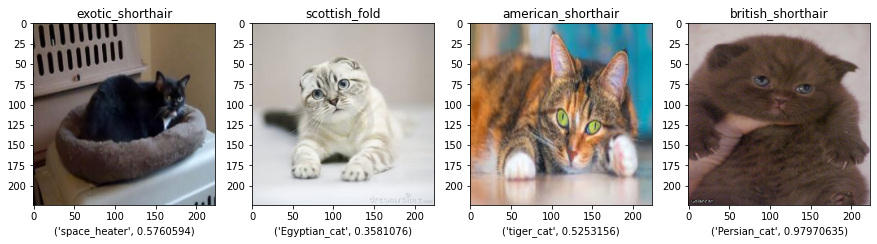

In [71]:
plt.figure(figsize=(15, 15))
print('                                                                                              Vgg16')
for i in range(4):
  
  ax = plt.subplot(1, 4, i+1)
  plt.imshow(new_img[i])
  plt.title(list(label_class.keys())[i])
  plt.xlabel(label[i][0][1:])

In [72]:
pred = model.predict(pre_img)

1/1 [==============================] - 0s 28ms/step


                                                                                              Vgg16


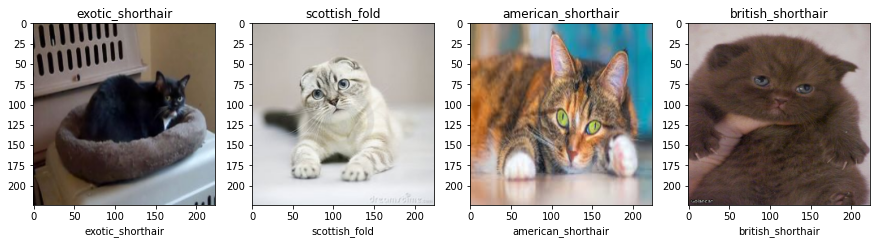

In [73]:
plt.figure(figsize=(15, 15))
print('                                                                                              Vgg16')
for i in range(4):
  ax = plt.subplot(1, 4, i+1)
  plt.imshow(new_img[i])
  plt.title(list(label_class.keys())[i])
  plt.xlabel(list(label_class.keys())[np.argmax(pred[i])])